In [3]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

In [4]:
t, g = smp.symbols("t g")
m1, m2 = smp.symbols("m1 m2")
L1, L2 = smp.symbols("L1 L2")

In [5]:
phi1 = smp.symbols("phi_1",cls=smp.Function)
phi2 = smp.symbols("phi_2",cls=smp.Function)

In [6]:
phi1, phi2 = phi1(t),phi2(t)

In [ ]:
phi1,phi2

In [7]:
phi1_d = smp.diff(phi1, t)
phi2_d = smp.diff(phi2, t)
phi1_dd = smp.diff(phi1_d, t)
phi2_dd = smp.diff(phi2_d, t)

In [8]:
x1 = L1*smp.sin(phi1)
y1 = -L1*smp.cos(phi1)
x2 = L1*smp.sin(phi1)+L2*smp.sin(phi2)
y2 = -L1*smp.cos(phi1)-L2*smp.cos(phi2)

In [9]:
T1 = 1/2 * m1 * (smp.diff(x1, t)**2 + smp.diff(y1, t)**2)
T2 = 1/2 * m2 * (smp.diff(x2, t)**2 + smp.diff(y2, t)**2)
T = T1+T2

In [ ]:
T

In [10]:
U1 = m1*g*y1
U2 = m2*g*y2
U = U1 + U2

In [ ]:
U

In [11]:
L = T-U

In [ ]:
L

In [12]:
LE1 = smp.diff(L, phi1) - smp.diff(smp.diff(L, phi1_d), t).simplify()
LE2 = smp.diff(L, phi2) - smp.diff(smp.diff(L, phi2_d), t).simplify()

In [13]:
LE1

-L1*g*m1*sin(phi_1(t)) - L1*g*m2*sin(phi_1(t)) - L1*(L1*m1*Derivative(phi_1(t), (t, 2)) + L1*m2*Derivative(phi_1(t), (t, 2)) - L2*m2*sin(phi_1(t) - phi_2(t))*Derivative(phi_1(t), t)*Derivative(phi_2(t), t) + L2*m2*sin(phi_1(t) - phi_2(t))*Derivative(phi_2(t), t)**2 + L2*m2*cos(phi_1(t) - phi_2(t))*Derivative(phi_2(t), (t, 2))) + 0.5*m2*(2*L1*(L1*sin(phi_1(t))*Derivative(phi_1(t), t) + L2*sin(phi_2(t))*Derivative(phi_2(t), t))*cos(phi_1(t))*Derivative(phi_1(t), t) - 2*L1*(L1*cos(phi_1(t))*Derivative(phi_1(t), t) + L2*cos(phi_2(t))*Derivative(phi_2(t), t))*sin(phi_1(t))*Derivative(phi_1(t), t))

In [14]:
LE2

-L2*g*m2*sin(phi_2(t)) - 1.0*L2*m2*(-L1*sin(phi_1(t) - phi_2(t))*Derivative(phi_1(t), t)**2 + L1*sin(phi_1(t) - phi_2(t))*Derivative(phi_1(t), t)*Derivative(phi_2(t), t) + L1*cos(phi_1(t) - phi_2(t))*Derivative(phi_1(t), (t, 2)) + L2*Derivative(phi_2(t), (t, 2))) + 0.5*m2*(2*L2*(L1*sin(phi_1(t))*Derivative(phi_1(t), t) + L2*sin(phi_2(t))*Derivative(phi_2(t), t))*cos(phi_2(t))*Derivative(phi_2(t), t) - 2*L2*(L1*cos(phi_1(t))*Derivative(phi_1(t), t) + L2*cos(phi_2(t))*Derivative(phi_2(t), t))*sin(phi_2(t))*Derivative(phi_2(t), t))

In [15]:
#Løser Lagrange likningene med hensyn på phi1_dd og phi2_dd
sols = smp.solve([LE1, LE2], (phi1_dd, phi2_dd),
                simplify=False, rational=False)

In [ ]:
sols[phi1_dd]

In [ ]:
sols[phi2_dd]

In [ ]:
"""
For å løse numerisk, definerer vi funksjonen z, slik at vi kan finne de løste
differensial likningene:
"""
dz1dt_f = smp.lambdify((t,g,m1,m2,L1,L2,phi1,phi2,phi1_d,phi2_d), sols[phi1_dd])
dz2dt_f = smp.lambdify((t,g,m1,m2,L1,L2,phi1,phi2,phi1_d,phi2_d), sols[phi2_dd])
dphi1dt_f = smp.lambdify(phi1_d, phi1_d)
dphi2dt_f = smp.lambdify(phi2_d, phi2_d)

In [ ]:
def dSdt(S, t, g, m1, m2, L1, L2):
    phi1, z1, phi2, z2 = S
    return [
        dphi1dt_f(z1),
        dz1dt_f(t, g, m1, m2, L1, L2, phi1, phi2, z1, z2),
        dphi2dt_f(z2),
        dz2dt_f(t, g, m1, m2, L1, L2, phi1, phi2, z1, z2),]

In [ ]:
"""
Setter initsialbetingelser og lager tidsrommet:
"""
t = np.linspace(0, 40, 1001)
g = 9.81
m1=1
m2=2
L1 = 2
L2 = 1
y0 = [np.pi,-3,1/2*np.pi,5]
#y0 er altså: Pendel1 sin startvinel og vinkelhastighet. Og Pendel2 sin startvinkel og vinkelhastighet

In [ ]:
#Bruker ode solver for å løse likningen:
ans = odeint(dSdt, y0, t=t, args=(g,m1,m2,L1,L2))

In [ ]:
ans1 = odeint(dSdt, y0=[1,2,3,4], t=t, args=(g,m1,m2,L1,L2))
ans2 = odeint(dSdt, y0=[1,-2,3,-3], t=t, args=(g,2,m2,1.2,2))
ans3 = odeint(dSdt, y0=[1,1,1/2*np.pi,np.pi], t=t, args=(g,2,1,1.2,1))

In [ ]:
ans4 = odeint(dSdt, y0=[0,0.1,0,0.1], t=t, args=(g,1,1,1,1))

In [ ]:
ans4

array([[ 0.        ,  0.1       ,  0.        ,  0.1       ],
       [ 0.00398955,  0.09921727,  0.00399998,  0.09999793],
       [ 0.00791681,  0.0968935 ,  0.00799947,  0.09996737],
       ...,
       [ 0.03278877,  0.01334603,  0.05346334,  0.01304902],
       [ 0.03322579,  0.00846059,  0.05366178, -0.00309568],
       [ 0.03346145,  0.00326273,  0.0532205 , -0.01887984]])

In [ ]:
ans4.T[0],ans4.T[2]

(array([0.        , 0.00398955, 0.00791681, ..., 0.03278877, 0.03322579,
        0.03346145]),
 array([0.        , 0.00399998, 0.00799947, ..., 0.05346334, 0.05366178,
        0.0532205 ]))

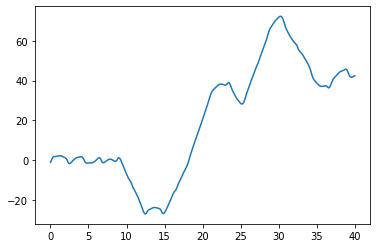

In [ ]:
plt.plot(t, phi2)
plt.show()

In [ ]:
ans

array([[ 1.        , -3.        , -1.        ,  5.        ],
       [ 0.87413906, -3.31025173, -0.78277685,  5.91440903],
       [ 0.73333306, -3.75998052, -0.52139856,  7.24155048],
       ...,
       [-2.13759318, -1.41988655, 42.27212899,  2.0224495 ],
       [-2.19090541, -1.24705711, 42.35327744,  2.041621  ],
       [-2.23745698, -1.08160654, 42.4360194 ,  2.10261664]])

In [ ]:
ans1

array([[  1.        ,   2.        ,   3.        ,   4.        ],
       [  1.07921934,   1.95286327,   3.15292354,   3.65179893],
       [  1.15567181,   1.86389457,   3.29264944,   3.34148819],
       ...,
       [  0.5069233 ,  -2.25716883, -17.03486552,  -4.46836686],
       [  0.42243087,  -1.94101976, -17.23191188,  -5.3946773 ],
       [  0.35402693,  -1.44513729, -17.46793724,  -6.43735878]])

In [ ]:
ans2

array([[  1.        ,  -2.        ,   3.        ,  -3.        ],
       [  0.91935625,  -2.02474585,   2.87735532,  -3.13493227],
       [  0.83868098,  -1.99995699,   2.74901519,  -3.28412709],
       ...,
       [ -7.52315132,   2.83004314, -12.1405286 ,  -4.22664498],
       [ -7.39133815,   3.79108234, -12.31580302,  -4.58658083],
       [ -7.21584231,   5.05961581, -12.5126025 ,  -5.3376167 ]])

In [ ]:
ans3

array([[ 1.        ,  1.        ,  1.57079633,  3.14159265],
       [ 1.0368038 ,  0.83752858,  1.69130273,  2.88616143],
       [ 1.06678478,  0.65880986,  1.80191313,  2.6473706 ],
       ...,
       [-0.19647355,  3.60672113, -0.68314178,  1.20436714],
       [-0.0547202 ,  3.46980814, -0.62148222,  1.88888179],
       [ 0.08024228,  3.26762516, -0.53155417,  2.60955865]])

In [ ]:
phi1 = ans.T[0]
phi2 = ans.T[2]

In [ ]:
ans.T[0], ans.T[2]

(array([ 1.        ,  0.87413906,  0.73333306, ..., -2.13759318,
        -2.19090541, -2.23745698]),
 array([-1.        , -0.78277685, -0.52139856, ..., 42.27212899,
        42.35327744, 42.4360194 ]))

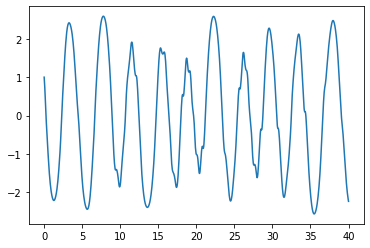

In [ ]:
plt.plot(t,phi1)
plt.show()

In [ ]:
def get_x1y1x2y2(t, phi1, phi2, L1, L2):
    return (L1*np.sin(phi1),
            -L1*np.cos(phi1),
            L1*np.sin(phi1) + L2*np.sin(phi2),
            -L1*np.cos(phi1) - L2*np.cos(phi2))

In [ ]:
x1, y1, x2, y2 = get_x1y1x2y2(t, ans.T[0], ans.T[2], L1, L2)

In [ ]:
#Vi definerer funksjonen for å animere:
def animer(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])

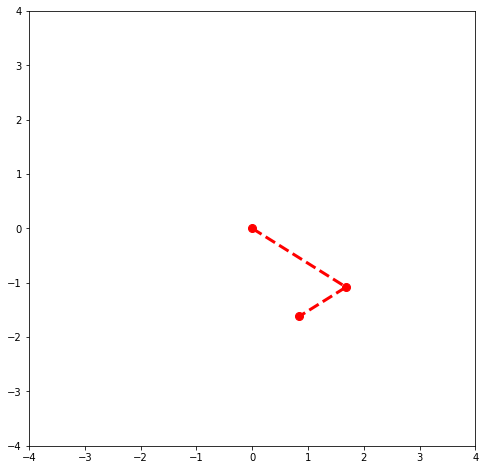

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
ani = animation.FuncAnimation(fig, animer, frames=1000, interval=50)
ani.save('Dobbel_pendel.gif',writer='pillow',fps=25)